<a href="https://colab.research.google.com/github/dpriyabijosh/Depression_detection/blob/main/Traditional_Models_Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

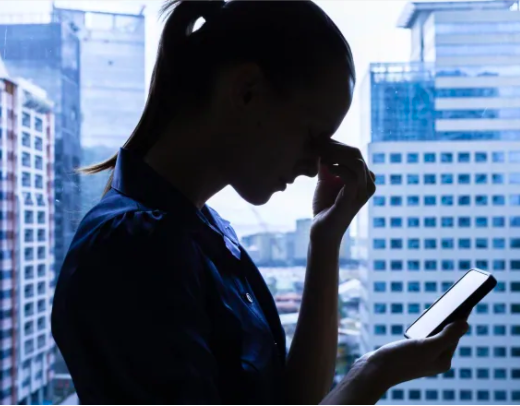

Depression is a mental illness that affects the quality of life which can lead to suicide. The major problem of the illness is that the chance of not knowing about the symptoms are very high. As per WHO, 280 million people world-wide suffer with this illness. The illness got worse due to the pandemic situation and a lot of people committed suicide which makes the importance to detect it in the early stages (Stephen & Prabu, 2019). It can be quite challenging for health care organisations to identify depression in the early stages because people are reluctant to seek care when necessary or uninformed of their mental state. In this era, people are very comfortable expressing their emotions in social media as posts, messages, and comments rather than speaking or sharing their emotions to other individuals (Burdisso et al., 2019). Social networking platforms represent a person’s personal life (Stephen & Prabu, 2019) which can be used for identifying the symptoms of mental illness such as depression by using natural language processing (NLP) with machine learning(ML) techniques. 

This implementation is to create a framework to detect early stage depression symptoms using different machine learning models.

## 1. Install and Load Essential Libraries

In [ ]:
!pip install import-ipynb
!pip install wordcloud
!pip install nltk
import os
import re
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import drive
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import gensim 
from gensim.models import Word2Vec 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import trange, tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import import_ipynb
import torch
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Colab Notebooks/Case1"
os.chdir(path)

Mounted at /content/drive


importing Jupyter notebook from DepressionDetection_preprocessing.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 14.5 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11877 entries, 0 to 11876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   11877 non-null  object
 1   label   11877 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 185.7+ KB


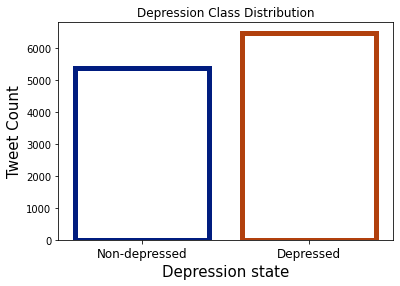

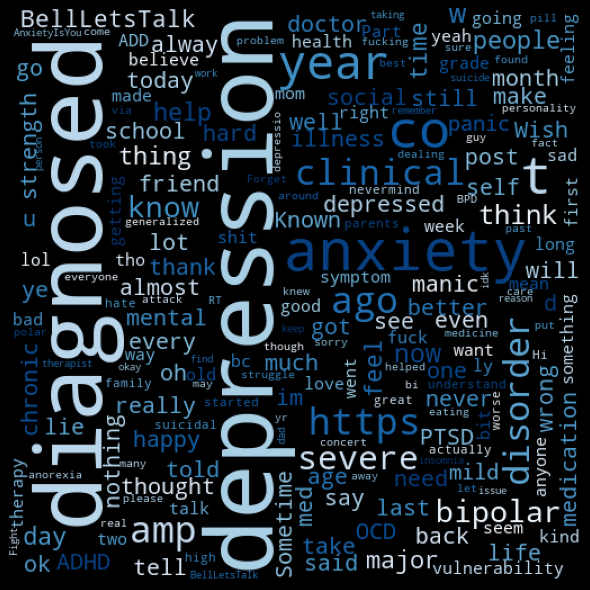

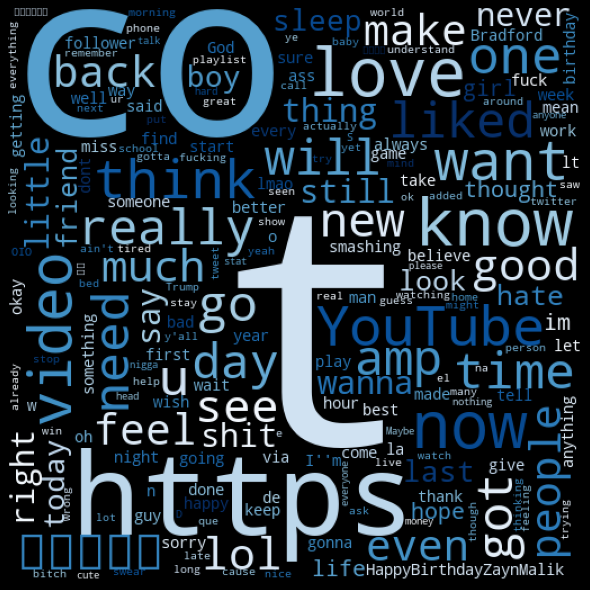

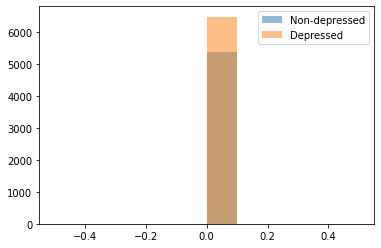

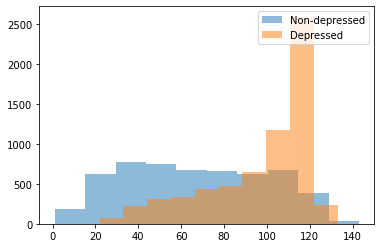

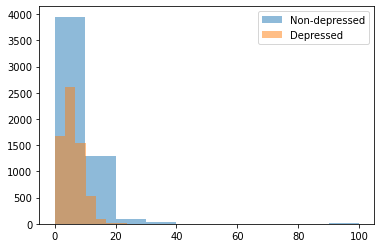

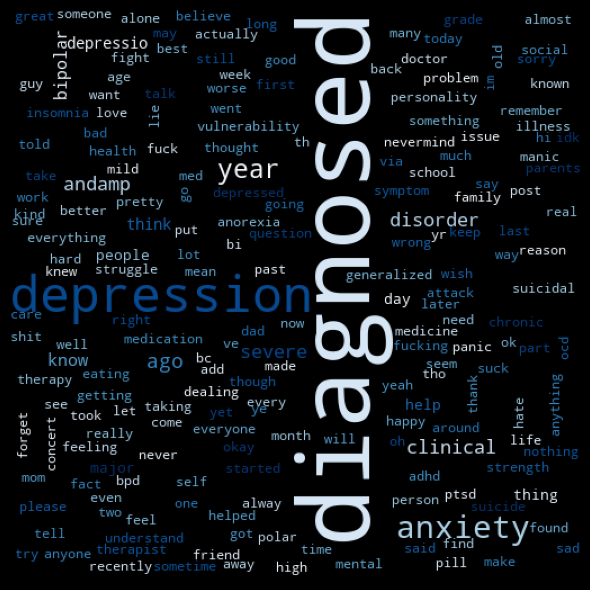

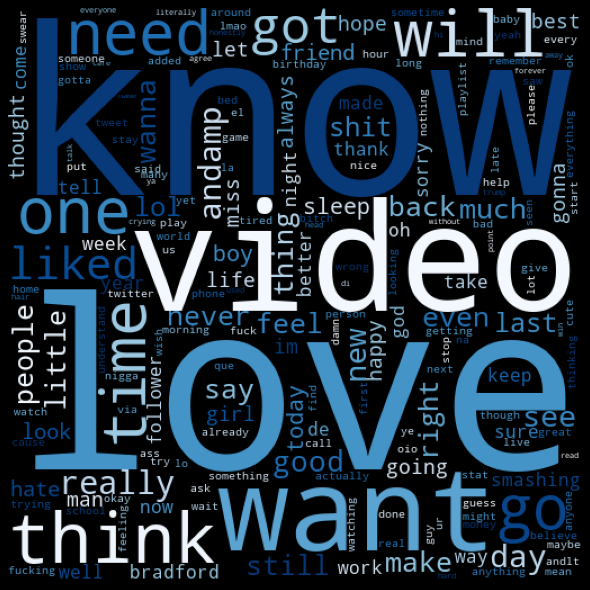

Total number of empty tweets
 tweet     
label    7
dtype: object
(11877, 2)
Initial size (11877, 2)
Shape after cleaning (11317, 2)
Initial size (11317, 2)
Shape after cleaning (11267, 2)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial size (11877, 2)
Shape after cleaning (11315, 2)


In [ ]:
#Import from pre-processing notebook
from DepressionDetection_preprocessing import *

## 2. Set up GPU for training

Google Colab offers free GPUs and TPUs. Since we'll be training a large neural network it's best to utilize these features.

A GPU can be added by going to the menu and selecting:

`Runtime -> Change runtime type -> Hardware accelerator: GPU`

Then we need to run the following cell to specify the GPU as the device.

In [ ]:
import torch
# Calling checking GPU function from pre-processing notebook
set_Cuda()

No GPU available, using the CPU instead.


## 2. Dataset

##2.1 Train Dataset Preparation

In [ ]:
#Load dataset
data_raw = initail_dataload()
data = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install tweet-preprocessor
import preprocessor as p
from tqdm.notebook import tqdm
tqdm.pandas()
# Tweet pre-processing
def tweet_preprocessing(text):
  text = text.replace("#","")

  # Replace '&amp;' with '&'
  text = re.sub(r'&amp;', '&', text)

  # Remove trailing whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return p.clean(text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.sample(5)

,tweet,label
9268,rush hospital life save commit behavioral heal...,1
7946,advice depression could read diagnose depressio,1
1743,help think could carry shop eye bag suggestion...,0
9140,time admit diagnose depressio,1
8317,diagnose depression know feel depress anxiety ...,1


In [ ]:
# Perform Cleaning and Lemmatization
data['tweet'] = data['tweet'].apply(tweet_preprocessing)

In [ ]:
 # Removing empty rows
data = clean_empty_rows(data,'tweet')

Initial size (11267, 2)
Shape after cleaning (11267, 2)


In [ ]:
data.sample(5)

,tweet,label
6166,diagnose clinical depressio,1
9563,years ago diagnose anxiety depression want die...,1
6040,diagnose ped post elf depressio,1
10222,diagnose pre natal depression find little awar...,1
5244,ed video hilarious almost king heart attack ca...,0


##Load Test data

## 2.2 Test dataset Preparation

In [ ]:
# Load data and set labels
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/validation_data.csv', 
                        dtype= {'raw_tweet': str, 'label':int}, nrows=500,  usecols=[0,1])


In [ ]:
test_data.head()

,raw_tweet,label
0,@_TASOfficial_ I really miss XYZ since 2016 i ...,1
1,There's not much an 8 mile depression run can'...,1
2,How to Overcome Depression#WednesdayThoughts #...,0
3,Real Talk #Kanye has never pulled himself full...,0
4,@andrea_r so it would seem. Good if you wanted...,0


In [ ]:
#Rename the columns
test_data.rename(columns={'raw_tweet' :'tweet'},inplace=True)
# Perform Cleaning and Lemmatization
test_data['tweet'] = test_data['tweet'].apply(clean_tweet)

In [ ]:
 # Removing empty rows
test_data = clean_empty_rows(test_data,'tweet')

Initial size (500, 2)
Shape after cleaning (500, 2)


In [ ]:
test_data.head()

,tweet,label
0,tasofficial really miss xyz since post anime d...,1
1,there be not much mile depression run cannot f...,1
2,how overcome depression aprile,0
3,real talk never pull fully depression suffer m...,0
4,would seem good want multi user video site als...,0


## 2.2 Test dataset Preparation

In [ ]:
# Load data and set labels
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/validation_data.csv', 
                        dtype= {'raw_tweet': str, 'label':int}, nrows=500,  usecols=[0,1])


In [ ]:
test_data

,raw_tweet,label
0,@_TASOfficial_ I really miss XYZ since 2016 i ...,1
1,There's not much an 8 mile depression run can'...,1
2,How to Overcome Depression#WednesdayThoughts #...,0
3,Real Talk #Kanye has never pulled himself full...,0
4,@andrea_r so it would seem. Good if you wanted...,0
...,...,...
495,depression is something i don't speak about ev...,1
496,@billchills @RealRyanWhorton I guess people wi...,0
497,me: wow summer depression won't hit me this ye...,1
498,"#MTV lol, @georgienba I don't think so.. I'm e...",0


In [ ]:
#Rename the columns
test_data.rename(columns={'raw_tweet' :'tweet'},inplace=True)
# Perform Cleaning and Lemmatization
test_data['tweet'] = test_data['tweet'].apply(clean_tweet)

In [ ]:
 # Removing empty rows
test_data = clean_empty_rows(test_data,'tweet')

Initial size (500, 2)
Shape after cleaning (500, 2)


In [ ]:
test_data

,tweet,label
0,tasofficial really miss xyz since post anime d...,1
1,there be not much mile depression run cannot f...,1
2,how overcome depression aprile,0
3,real talk never pull fully depression suffer m...,0
4,would seem good want multi user video site als...,0
...,...,...
495,depression something speak even go also double...,1
496,guess people depression deserve get job then l...,0
497,me wow summer depression hit year can feel its...,1
498,lol think so be excite be older,0


## Apply TF-IDF 

In information retrieval, TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We will use TF-IDF to vectorize our text data before feeding them to machine learning algorithms. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfIdf_Vectorization(corpus):
  vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2), max_df = 0.8, sublinear_tf=True, use_idf=True)
  tdidf_tensor = vectorizer.fit_transform(corpus)
  return tdidf_tensor

### Creating TF-IDF tensors for training dataset

In [ ]:
corpus = data['tweet'].values.astype('U')
tdidf_tensor= tfIdf_Vectorization(corpus)
print('shape',tdidf_tensor.shape)

shape (11267, 3058)


### Creating TF-IDF tensors for testing dataset

In [ ]:
def tfidf(data, ngrams = 1):

    df_temp = data.copy(deep = True)
    #df_temp = basic_preprocessing(df_temp)
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp['tweet'])

    list_corpus = df_temp["tweet"].tolist()
    list_labels = df_temp["label"].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels, tfidf_vectorizer


def test_tfidf(data, vectorizer= CountVectorizer, ngrams = 1):

    df_temp = data.copy(deep = True)
    #df_temp = basic_preprocessing(df_temp)

    # No need to create a new TfidfVectorizer here!

    list_corpus = df_temp["tweet"].tolist()
    list_labels = df_temp["label"].tolist()

    X = vectorizer.transform(list_corpus)
    
    return X, list_labels


In [ ]:
train_x, train_y, count_vectorizer  = tfidf(data, ngrams = 1)
test_x, test_y = test_tfidf(test_data, count_vectorizer, ngrams = 1)

In [ ]:
#test_tdidf_tensor

##Function

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Importing to do standardisation
from sklearn.model_selection import train_test_split #Importing to split our data for training
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,confusion_matrix, classification_report,mean_squared_error
from collections import Counter 
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Standardisation
def scalerFn(x_train,x_test):
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test  = scaler.transform(x_test)   
    return x_train,x_test

In [ ]:
#Spliting train and test set for machine learning
def trainNtest(X,target):
    X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.80, stratify=target, random_state=40)# The dataset is divided into 70 and 30
    return X_train,X_test,y_train,y_test

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from numpy.ma.core import mean
from statistics import mean, stdev
def cross_validation(model, x, y):
  # Create StratifiedKFold object.
   skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
   lst_accu_stratified = []
   
   for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        mdl = model.fit(x_train_fold, y_train_fold)
        #prediction_model(mdl,x,y)
        lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
   print('List of possible accuracy:', lst_accu_stratified)
   print('\nMaximum Accuracy That can be obtained from this model is:',
          max(lst_accu_stratified)*100, '%')
   print('\nMinimum Accuracy:',
          min(lst_accu_stratified)*100, '%')
   print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
   print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 
   #prediction_model(model,x,y)     

In [ ]:
#Function to find the cross validation score
def crossValidationScore(model,x,y):
    scores = cross_val_score(model, x, y, cv=5)
    print("Accuracy cross validation :",round(scores.mean()*100,2),"%")
    prediction_model(model,x,y)

# Split Train and Test dataset

We will randomly split the entire training data into two sets: a train set with 90% of the data and a validation set with 10% of the data. We will perform hyperparameter tuning using cross-validation on the train set and use the validation set to compare models.

In [ ]:
train_x

<11267x11261 sparse matrix of type '<class 'numpy.float64'>'
	with 86166 stored elements in Compressed Sparse Row format>

In [ ]:
# Function to see the accuracy, classification report and confusion matrix
def prediction_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    c_matrix =confusion_matrix(y_test,y_pred)
    clr = classification_report(y_test,y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy", round(accuracy,2) )
    plt.figure(figsize=(8,8))
    sns.heatmap(c_matrix,annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title("Confusion matrix")
    plt.show()
    print(clr)

### Checking Distribution Training data set

In [ ]:
#Function to check class imbalance by plotting the target
import seaborn as sns
def checkingImbalance(target):    
    b=sns.countplot(x=target, 
                       facecolor=(0, 0, 0, 0),
                       linewidth=5,
                       edgecolor=sns.color_palette("dark", 3))
    plt.xlabel('Y-train',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.title('Y-train distribution plot')
    x_labels = ['Non-depressed','Depressed']
    b.set_xticklabels(x_labels,fontsize=12)

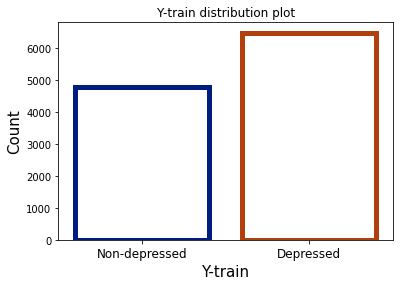

In [ ]:
#Function to check class imbalance by plotting the target
checkingImbalance(train_y)

### Training Test dataset

In [ ]:
#Function to check class imbalance by plotting the target
import seaborn as sns
def test(target):    
    b=sns.countplot(x=target, 
                       facecolor=(0, 0, 0, 0),
                       linewidth=5,
                       edgecolor=sns.color_palette("dark", 3))
    plt.xlabel('Depression Class',fontsize=15)
    plt.ylabel('Tweet Count',fontsize=15)
    plt.title('Depression class distribution plot')
    x_labels = ['Non-depressed','Depressed']
    b.set_xticklabels(x_labels,fontsize=12)

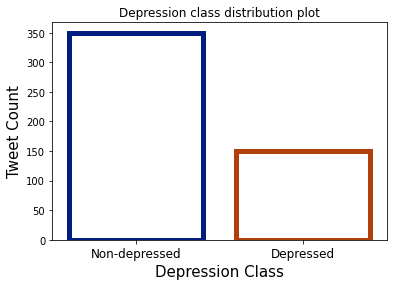

In [ ]:
test(test_data['label'])

In [ ]:
test_data.label.value_counts()

0    350
1    150
Name: label, dtype: int64

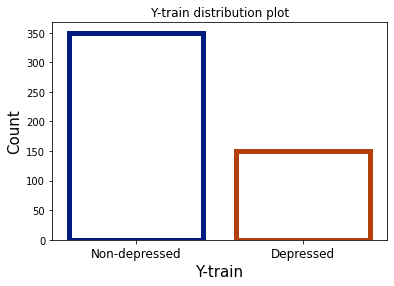

In [ ]:
checkingImbalance(test_data['label'])

# Sampling Techniques:


###SMOTE Oversampler to solve class imbalance issue

In [ ]:
#Function to create sample using SMOTE
def applySmote(X_train,y_train):
  sm = SMOTE(random_state=42)
  x, y = SMOTE().fit_resample(X_train, y_train) 
  return x, y

###RandomUnderSampler to solve class imbalance issue

In [ ]:
#Function to create sample using Random undersampler
def applyOverSampler(x,y):
    ros = RandomOverSampler(random_state=42)
    x, y = ros.fit_resample(x, y)
    return x, y

###ADASYS OverSampler 


In [ ]:
from imblearn.over_sampling import ADASYN 
def applyAdasynOS(X,y):
 #input DataFrame
 #X : Independent Variable 
 #y : Dependent Variable 
    sm = ADASYN()
    X, y = sm.fit_resample(X, y)
    return(X,y)

# Training Models

##Traditional models with TF-IDF

###Create train and test dataset

## SVM MODEL

In [ ]:
train_x, train_y, count_vectorizer  = tfidf(data, ngrams = 1)
test_x, test_y = test_tfidf(test_data, count_vectorizer, ngrams = 1)

In [ ]:
#svm_tf_idf = SVC()
svm_tf_idf = svm.SVC(C=5, kernel='rbf', degree=3, gamma=0.5)
svm_tf_idf = svm_tf_idf.fit(train_x, train_y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Accuracy 0.74


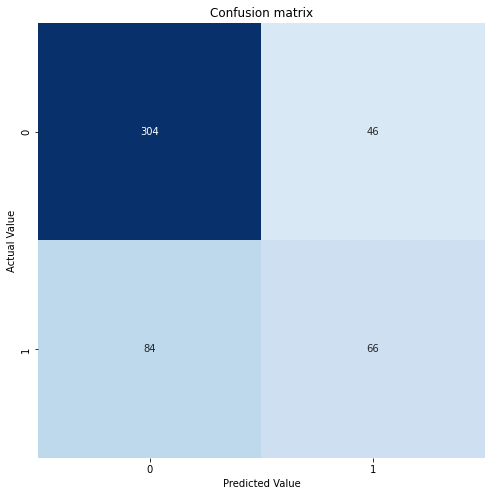

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.59      0.44      0.50       150

    accuracy                           0.74       500
   macro avg       0.69      0.65      0.66       500
weighted avg       0.73      0.74      0.73       500



In [ ]:
%time
prediction_model(svm_tf_idf, test_x, test_y)

Apply SMOTE

In [ ]:
X_smote, y_smote  = applySmote(train_x, train_y)

In [ ]:
svm_tfidf_smote = svm_tf_idf.fit(X_smote, y_smote)

Accuracy 0.74


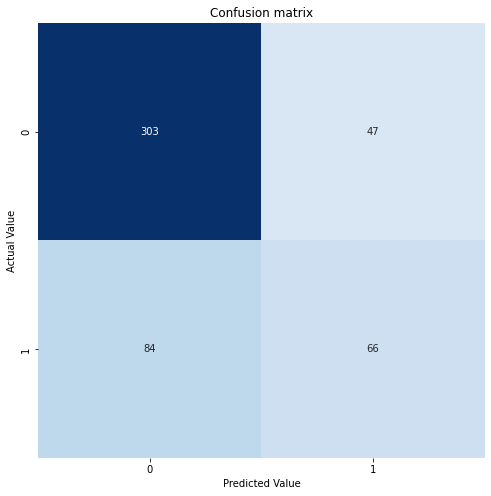

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.58      0.44      0.50       150

    accuracy                           0.74       500
   macro avg       0.68      0.65      0.66       500
weighted avg       0.72      0.74      0.73       500



In [ ]:
prediction_model(svm_tfidf_smote, test_x, test_y)

##Apply RandomOverSampler

In [ ]:
X_ros, y_ros = applyOverSampler(train_x, train_y)

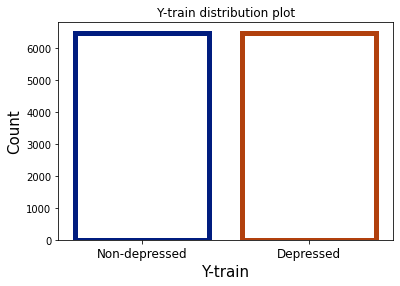

In [ ]:
checkingImbalance(y_ros)

In [ ]:
svm_tfidf_ros = svm_tf_idf.fit(X_ros, y_ros)

Accuracy 0.74


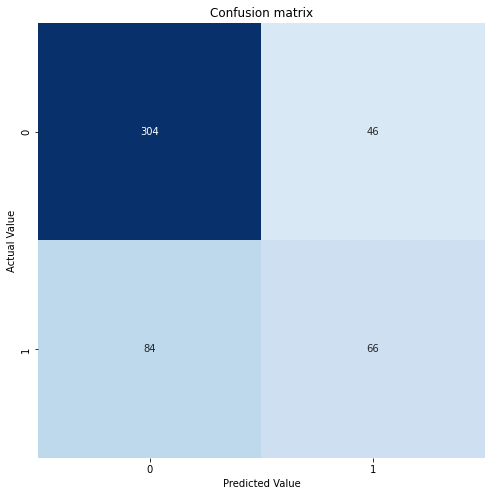

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.59      0.44      0.50       150

    accuracy                           0.74       500
   macro avg       0.69      0.65      0.66       500
weighted avg       0.73      0.74      0.73       500



In [ ]:
prediction_model(svm_tfidf_ros, test_x, test_y)

##Apply ADASYN

In [ ]:
X_ada, y_ada = applyAdasynOS(train_x, train_y)

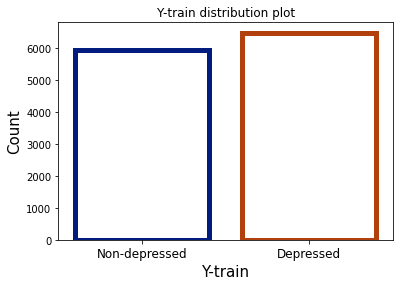

In [ ]:
checkingImbalance(y_ada)

In [ ]:
svm_tfidf_ada = svm_tf_idf.fit(X_ada, y_ada)

Accuracy 0.74


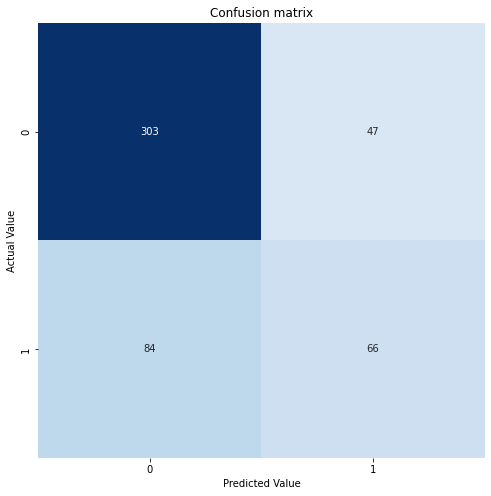

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.58      0.44      0.50       150

    accuracy                           0.74       500
   macro avg       0.68      0.65      0.66       500
weighted avg       0.72      0.74      0.73       500



In [ ]:
prediction_model(svm_tfidf_ada, test_x, test_y)

## 2. Logistic Regression Classifier

In [ ]:
%time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

logReg_tfIdf = LogisticRegression(random_state=0)
#LogisticRegression(penalty='l2', solver="sag", random_state=0, max_iter=2000)
logReg_tfIdf_model = logReg_tfIdf.fit(train_x, train_y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
Accuracy 0.74


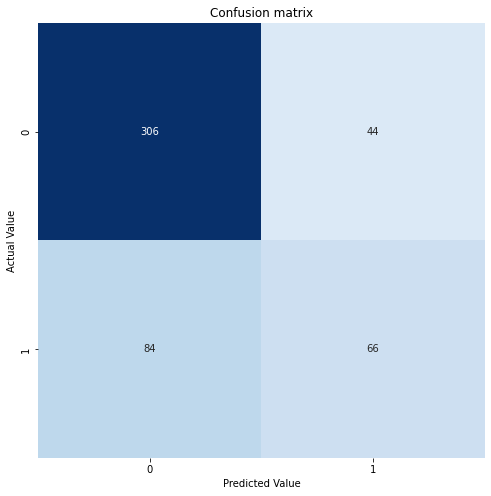

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       350
           1       0.60      0.44      0.51       150

    accuracy                           0.74       500
   macro avg       0.69      0.66      0.67       500
weighted avg       0.73      0.74      0.73       500



In [ ]:
%time
prediction_model(logReg_tfIdf_model, test_x, test_y)

###Apply cross validation

###Apply SMOTE

In [ ]:
# The X_smote and Y_smote are already declared
logReg_tfIdf_smote = logReg_tfIdf.fit(X_smote, y_smote)

Accuracy 0.74


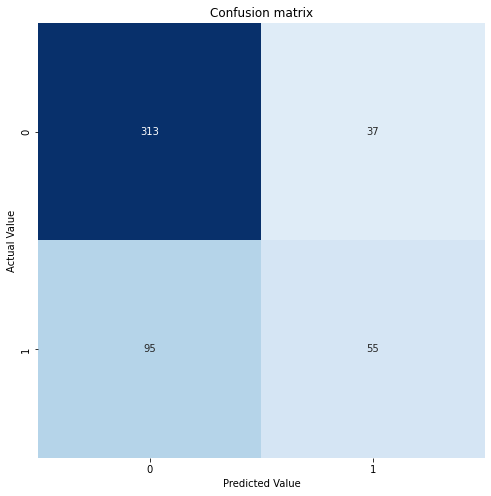

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       350
           1       0.60      0.37      0.45       150

    accuracy                           0.74       500
   macro avg       0.68      0.63      0.64       500
weighted avg       0.72      0.74      0.71       500



In [ ]:
prediction_model(logReg_tfIdf_smote, test_x, test_y)

##Apply RandomOverSampler

In [ ]:
# Using already sampled X_ros and y_ros
logReg_tfidf_ros = logReg_tfIdf.fit(X_ros, y_ros)

Accuracy 0.73


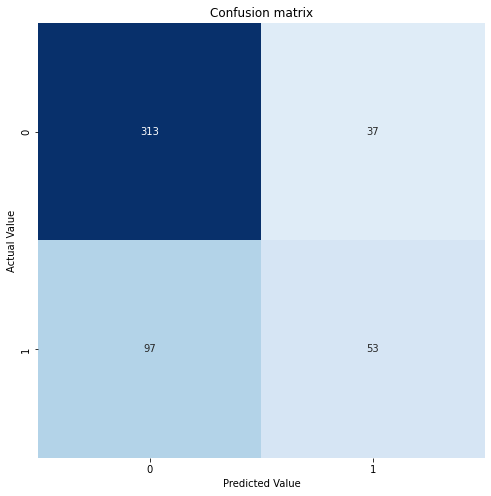

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       350
           1       0.59      0.35      0.44       150

    accuracy                           0.73       500
   macro avg       0.68      0.62      0.63       500
weighted avg       0.71      0.73      0.71       500



In [ ]:
prediction_model(logReg_tfidf_ros, test_x, test_y)

##Apply ADASYN

In [ ]:
# Using already sampled X_ada and y_ada
logReg_tfidf_ada = logReg_tfIdf.fit(X_ada, y_ada)

Accuracy 0.73


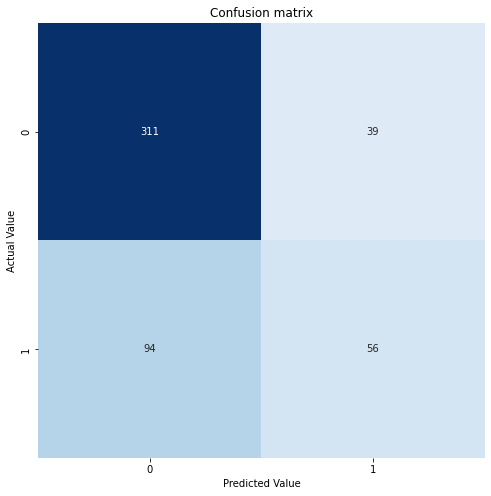

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       350
           1       0.59      0.37      0.46       150

    accuracy                           0.73       500
   macro avg       0.68      0.63      0.64       500
weighted avg       0.71      0.73      0.71       500



In [ ]:
prediction_model(logReg_tfidf_ada, test_x, test_y)

# Decision Tree Classifier

##Decision Tree with TF-IDF

In [ ]:
dT_tfIdf = DecisionTreeClassifier(random_state=0) 
dT_tfIdf_model = dT_tfIdf.fit(train_x, train_y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Accuracy 0.76


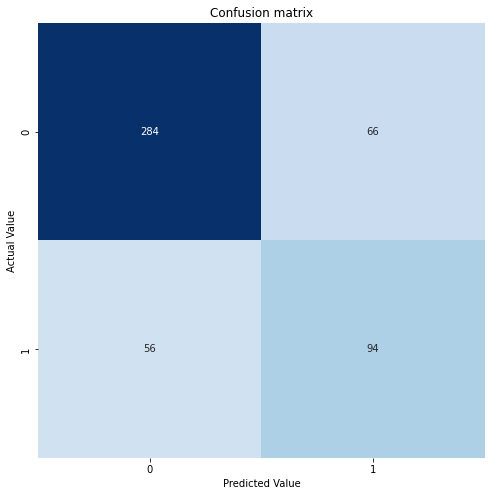

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       350
           1       0.59      0.63      0.61       150

    accuracy                           0.76       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.76      0.76      0.76       500



In [ ]:
%time
prediction_model(dT_tfIdf_model, test_x, test_y)

###Apply SMOTE

In [ ]:
# The X_smote and Y_smote are already declared
dT_tfIdf_smote = dT_tfIdf.fit(X_smote, y_smote)

Accuracy 0.75


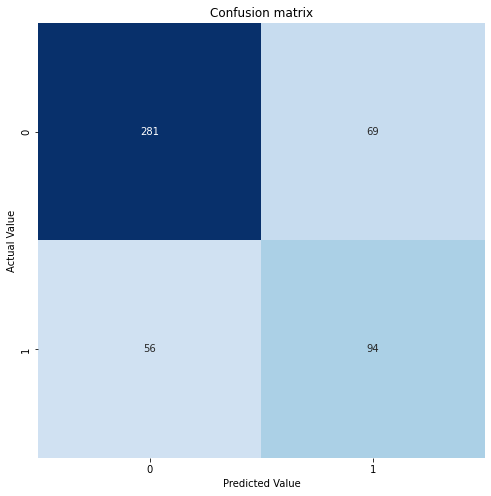

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       350
           1       0.58      0.63      0.60       150

    accuracy                           0.75       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.76      0.75      0.75       500



In [ ]:
prediction_model(dT_tfIdf_smote, test_x, test_y)

##Apply RandomOverSampler

In [ ]:
# Using already sampled X_ros and y_ros
dT_tfidf_ros = dT_tfIdf.fit(X_ros, y_ros)

Accuracy 0.75


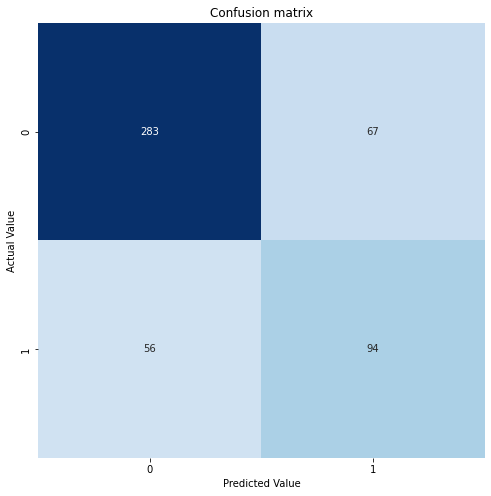

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       350
           1       0.58      0.63      0.60       150

    accuracy                           0.75       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.76      0.75      0.76       500



In [ ]:
prediction_model(dT_tfidf_ros, test_x, test_y)

##Apply ADASYN

In [ ]:
# Using already sampled X_ada and y_ada
dT_tfidf_ada = dT_tfIdf.fit(X_ada, y_ada)

Accuracy 0.75


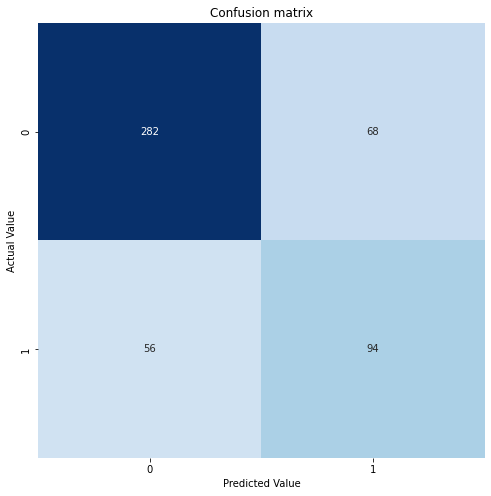

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       350
           1       0.58      0.63      0.60       150

    accuracy                           0.75       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.76      0.75      0.75       500



In [ ]:
prediction_model(dT_tfidf_ada, test_x, test_y)

# KNN Model

##KNN with TF-IDF

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#dT_tfIdf = DecisionTreeClassifier(random_state=0) 
knn_tfIdf = knn.fit(train_x, train_y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs
Accuracy 0.59


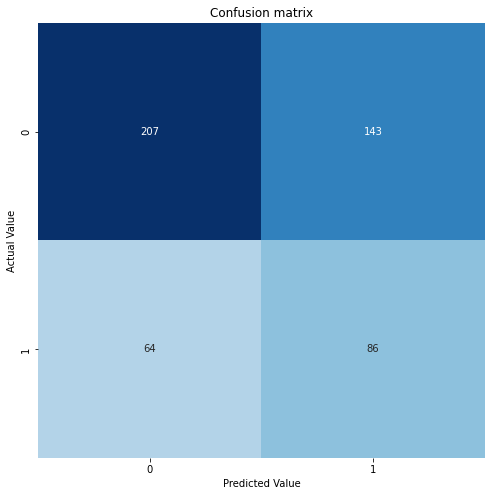

              precision    recall  f1-score   support

           0       0.76      0.59      0.67       350
           1       0.38      0.57      0.45       150

    accuracy                           0.59       500
   macro avg       0.57      0.58      0.56       500
weighted avg       0.65      0.59      0.60       500



In [ ]:
%time
prediction_model(knn_tfIdf, test_x, test_y)

#### Cross validation

###Apply SMOTE

In [ ]:
# The X_smote and Y_smote are already declared
knn_tfIdf_smote = knn_tfIdf.fit(X_smote, y_smote)

Accuracy 0.67


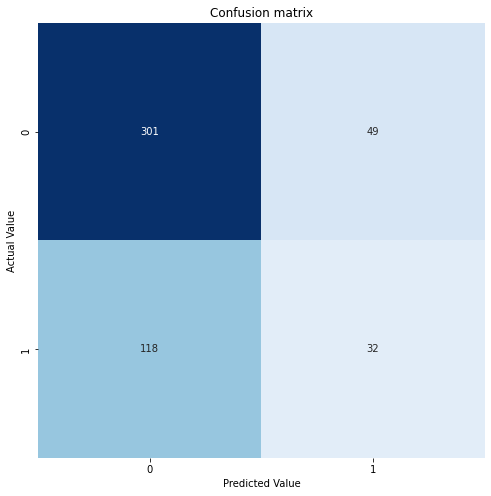

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       350
           1       0.40      0.21      0.28       150

    accuracy                           0.67       500
   macro avg       0.56      0.54      0.53       500
weighted avg       0.62      0.67      0.63       500



In [ ]:
prediction_model(knn_tfIdf_smote, test_x, test_y)

##Apply RandomOverSampler

In [ ]:
# Using already sampled X_ros and y_ros
knn_tfidf_ros = knn_tfIdf.fit(X_ros, y_ros)

Accuracy 0.6


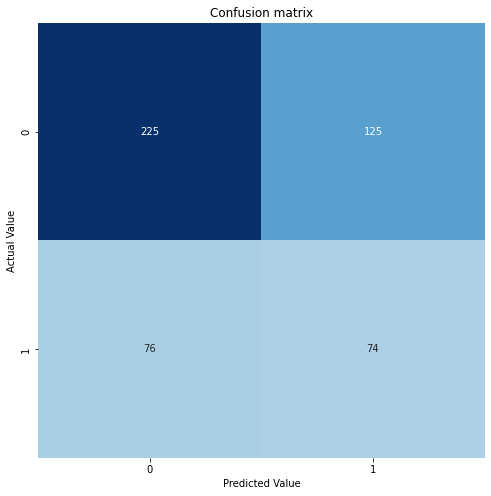

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       350
           1       0.37      0.49      0.42       150

    accuracy                           0.60       500
   macro avg       0.56      0.57      0.56       500
weighted avg       0.63      0.60      0.61       500



In [ ]:
prediction_model(knn_tfidf_ros, test_x, test_y)

##Apply ADASYN

In [ ]:
# Using already sampled X_ada and y_ada
knn_tfidf_ada = knn_tfIdf.fit(X_ada, y_ada)

Accuracy 0.67


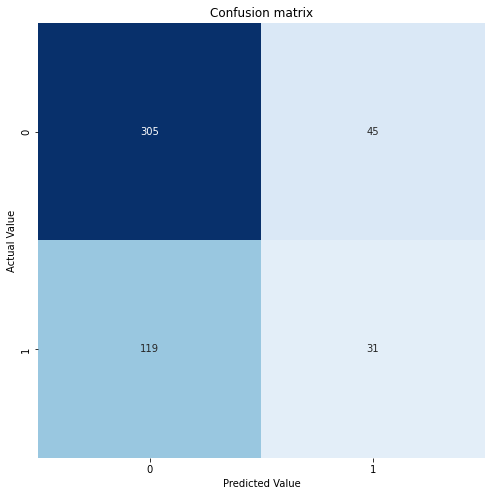

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       350
           1       0.41      0.21      0.27       150

    accuracy                           0.67       500
   macro avg       0.56      0.54      0.53       500
weighted avg       0.63      0.67      0.63       500



In [ ]:
prediction_model(knn_tfidf_ada, test_x, test_y)

# Hyperparemeter Tuning & Evaluation

### 2.2. Evaluation on Validation Set

To evaluate the performance of our model, we will calculate the accuracy rate and the AUC score of our model on the validation set.

In [ ]:
def model_predict(model,X_test):
  y_pred = model.predict(X_test)
  return y_pred